In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving titanic_dataset_with_missing.csv to titanic_dataset_with_missing.csv


In [3]:
df_titanic = pd.read_csv("titanic_dataset_with_missing.csv")

In [4]:
df_titanic.fillna(df_titanic.median(), inplace=True)

In [5]:
# Define features and target variable
X_titanic = df_titanic.drop(columns=['fare'])  # Features
y_titanic = df_titanic['fare']  # Target (ราคาตั๋ว)

In [6]:
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(
    X_titanic, y_titanic, test_size=0.2, random_state=42
)

In [7]:
# Standardize data for better performance
scaler_titanic = StandardScaler()
X_train_titanic = scaler_titanic.fit_transform(X_train_titanic)
X_test_titanic = scaler_titanic.transform(X_test_titanic)

In [10]:
# Import the required library
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_model_titanic = RandomForestRegressor(
    n_estimators=500, max_depth=20, random_state=42, n_jobs=-1
)

rf_model_titanic.fit(X_train_titanic, y_train_titanic)
y_pred_rf = rf_model_titanic.predict(X_test_titanic)


In [12]:
# Import the required library
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Regressor
gb_model_titanic = GradientBoostingRegressor(
    n_estimators=500, learning_rate=0.03, max_depth=7, random_state=42
)

gb_model_titanic.fit(X_train_titanic, y_train_titanic)
y_pred_gb = gb_model_titanic.predict(X_test_titanic)


In [13]:
# Evaluate Models
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"  MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}\n")
    return mae, mse, rmse, r2

In [14]:
# Evaluate Models
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"  MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}\n")
    return mae, mse, rmse, r2

In [15]:
# Evaluate each model
rf_results = evaluate_model(y_test_titanic, y_pred_rf, "Random Forest")
gb_results = evaluate_model(y_test_titanic, y_pred_gb, "Gradient Boosting")

Random Forest Performance:
  MAE: 48.16, MSE: 3318.83, RMSE: 57.61, R²: -0.21

Gradient Boosting Performance:
  MAE: 52.99, MSE: 4159.60, RMSE: 64.49, R²: -0.51



In [16]:
# Compare Models with Bar Chart
models = ['Random Forest', 'Gradient Boosting']
mae_values = [rf_results[0], gb_results[0]]
mse_values = [rf_results[1], gb_results[1]]
rmse_values = [rf_results[2], gb_results[2]]
r2_values = [rf_results[3], gb_results[3]]

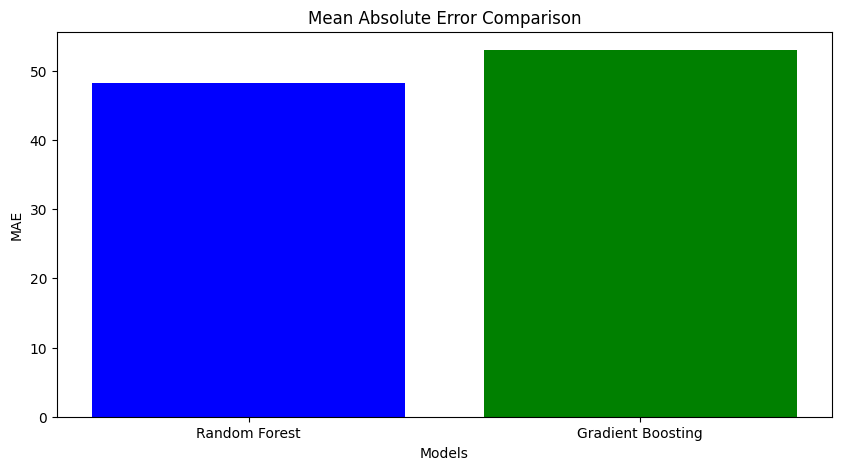

In [17]:
plt.figure(figsize=(10, 5))
plt.bar(models, mae_values, color=['blue', 'green'])
plt.xlabel("Models")
plt.ylabel("MAE")
plt.title("Mean Absolute Error Comparison")
plt.show()

In [18]:
# Function for user input prediction
def predict_fare_price():
    input_features = []
    for feature in X_titanic.columns:
        value = float(input(f"Enter value for {feature}: "))
        input_features.append(value)

    if len(input_features) != X_titanic.shape[1]:
        raise ValueError(f"Expected {X_titanic.shape[1]} features, but got {len(input_features)}")

    input_array = np.array(input_features).reshape(1, -1)
    input_scaled = scaler_titanic.transform(input_array)
    predicted_rf = rf_model_titanic.predict(input_scaled)[0]
    predicted_gb = gb_model_titanic.predict(input_scaled)[0]

    weighted_avg_fare = (0.6 * predicted_rf) + (0.4 * predicted_gb)  # Weighting Random Forest more

    print(f"Predicted Fare Price (Random Forest): {predicted_rf:.2f}")
    print(f"Predicted Fare Price (Gradient Boosting): {predicted_gb:.2f}")
    print(f"Weighted Average Predicted Fare Price: {weighted_avg_fare:.2f}")

# Example usage
predict_fare_price()

Enter value for age: 71
Enter value for sibsp: 3
Enter value for parch: 0
Enter value for survived: 0
Enter value for sex_male: 1
Enter value for class_Second: 0
Enter value for class_Third: 1
Predicted Fare Price (Random Forest): 57.11
Predicted Fare Price (Gradient Boosting): 41.21
Weighted Average Predicted Fare Price: 50.75


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
import pickle

# ตรวจสอบก่อนบันทึกไฟล์
if 'rf_model_titanic' in locals():
    pickle.dump(rf_model_titanic, open("rf_model.pkl", "wb"))
    print("✅ บันทึกโมเดล Random Forest สำเร็จ!")

if 'gb_model_titanic' in locals():
    pickle.dump(gb_model_titanic, open("gb_model.pkl", "wb"))
    print("✅ บันทึกโมเดล Gradient Boosting สำเร็จ!")

if 'scaler_titanic' in locals():
    pickle.dump(scaler_titanic, open("scaler.pkl", "wb"))
    print("✅ บันทึก StandardScaler สำเร็จ!")

print("🎉 บันทึกโมเดล Machine Learning ทั้งหมดสำเร็จแล้ว!")


✅ บันทึกโมเดล Random Forest สำเร็จ!
✅ บันทึกโมเดล Gradient Boosting สำเร็จ!
✅ บันทึก StandardScaler สำเร็จ!
🎉 บันทึกโมเดล Machine Learning ทั้งหมดสำเร็จแล้ว!
